In [94]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
crash_data = pd.read_pickle('crash_processed_data.pkl')

In [96]:
crash_data.columns

Index(['ACCIDENT_NO', 'SEX', 'AGE', 'HELMET_BELT_WORN', 'ACCIDENTTIME',
       'DAY_OF_WEEK', 'Day Week Description', 'LIGHT_CONDITION',
       'Light Condition Desc', 'ROAD_GEOMETRY', 'Road Geometry Desc',
       'SEVERITY', 'SPEED_ZONE', 'SURFACE_COND', 'Surface Cond Desc',
       'VEHICLE_BODY_STYLE', 'TOTAL_NO_OCCUPANTS', 'VEHICLE_YEARS_OLD',
       'LAMPS'],
      dtype='object')

In [97]:
crash_data['TOTAL_NO_OCCUPANTS'].value_counts()

TOTAL_NO_OCCUPANTS
1.0     467322
2.0      95809
3.0      26752
4.0      12024
0.0      10797
5.0       4508
6.0        771
7.0        267
8.0        117
9.0         81
12.0        42
10.0        31
11.0        28
13.0        25
20.0        21
15.0        11
16.0         9
47.0         8
30.0         7
14.0         7
17.0         7
18.0         6
21.0         5
25.0         5
19.0         4
22.0         4
48.0         4
31.0         4
49.0         2
37.0         2
28.0         2
33.0         2
34.0         2
32.0         2
44.0         2
27.0         2
24.0         2
35.0         1
29.0         1
Name: count, dtype: int64

**Distribution of Accident Severity Across Different Features: Analyzing the Impact of Speed Zones, Road Conditions, and More**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


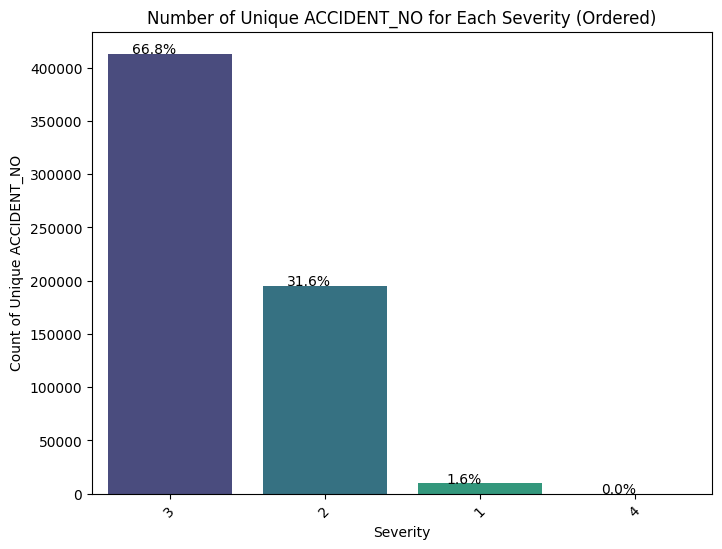

In [98]:
# Plot showing the number of unique ACCIDENT_NO for each severity in ascending order with percentage
plt.figure(figsize=(8, 6))
sns.countplot(data=crash_data, x='SEVERITY', palette='viridis', order=crash_data['SEVERITY'].value_counts().index)
plt.title('Number of Unique ACCIDENT_NO for Each Severity (Ordered)')
plt.xlabel('Severity')
plt.ylabel('Count of Unique ACCIDENT_NO')
plt.xticks(rotation=45)

# Calculate and display percentage distribution
total_records = len(crash_data)
ax = plt.gca()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize=10, ha='center')

plt.show()


<Figure size 1200x800 with 0 Axes>

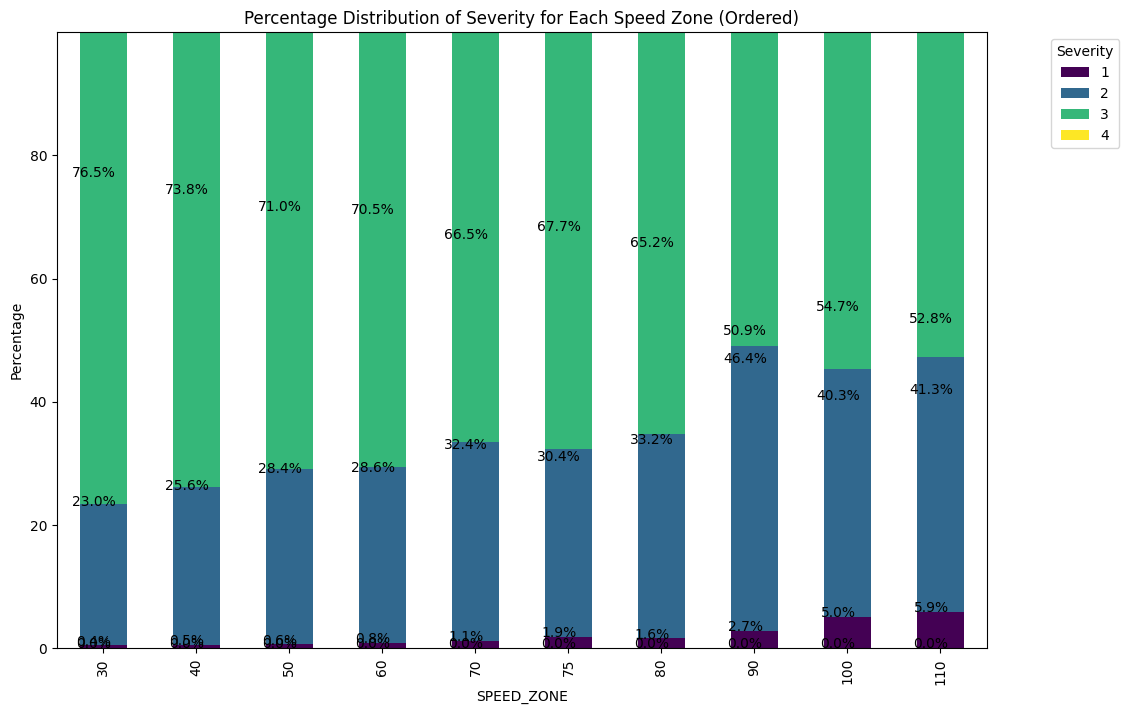

In [99]:

# Group the data by 'SPEED_ZONE' and calculate the percentage distribution of each severity level within each speed zone
percentage_by_speed_zone = crash_data.groupby(['SPEED_ZONE', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_speed_zone = percentage_by_speed_zone.div(percentage_by_speed_zone.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
percentage_by_speed_zone.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Speed Zone (Ordered)')
plt.xlabel('SPEED_ZONE')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages
ax = plt.gca()
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center')

plt.show()


As Speed Zone gets Faster, The Distribution of Severity becomes more skewed towards 1,2. Speed is definitely a telling factor for severity

/var/folders/pp/v93sqgpd3dzcpdx34t0c9n280000gn/T/ipykernel_17272/3521678323.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_age_band = crash_data.groupby(['AGE_BAND', 'SEVERITY']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

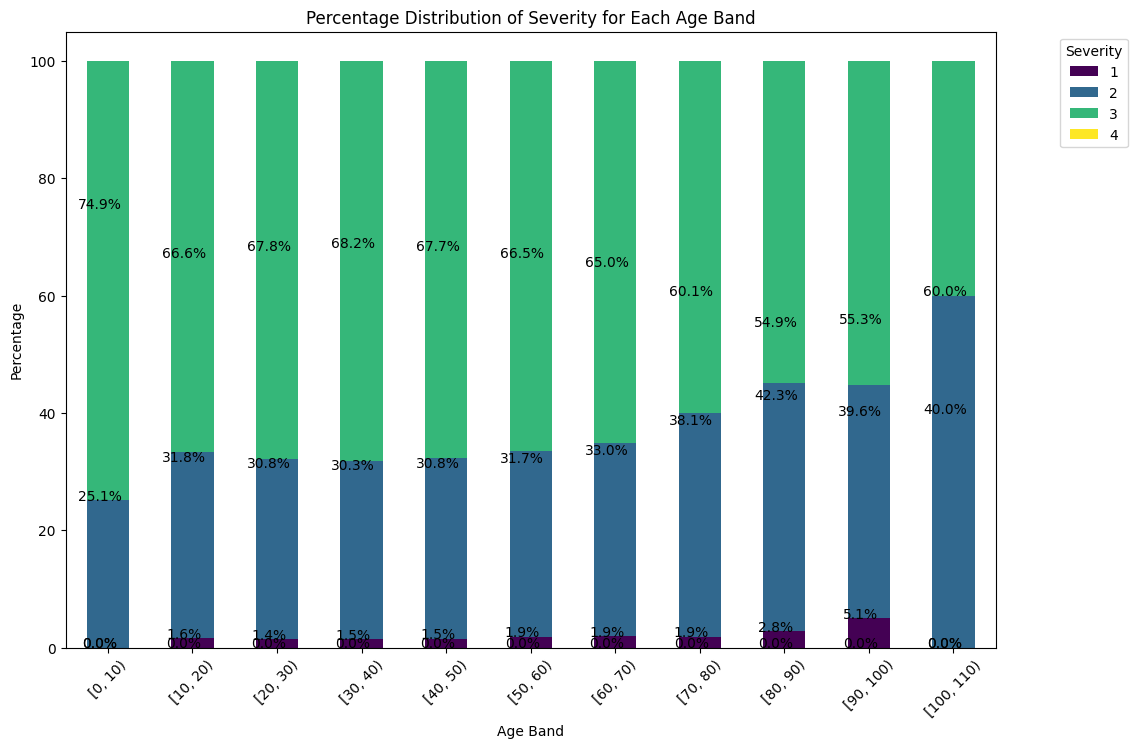

In [100]:

# Create age bands in 10-year increments
crash_data['AGE_BAND'] = pd.cut(crash_data['AGE'], bins=range(0, 120, 10), right=False)

# Group the data by 'AGE_BAND' and 'SEVERITY', and calculate the percentage distribution of each severity level within each age band
percentage_by_age_band = crash_data.groupby(['AGE_BAND', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_age_band = percentage_by_age_band.div(percentage_by_age_band.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
percentage_by_age_band.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages
ax = plt.gca()
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center')

plt.show()


Seems to be a positive correlation between age and severity (older people involved in more severe crashes)

<Figure size 1200x800 with 0 Axes>

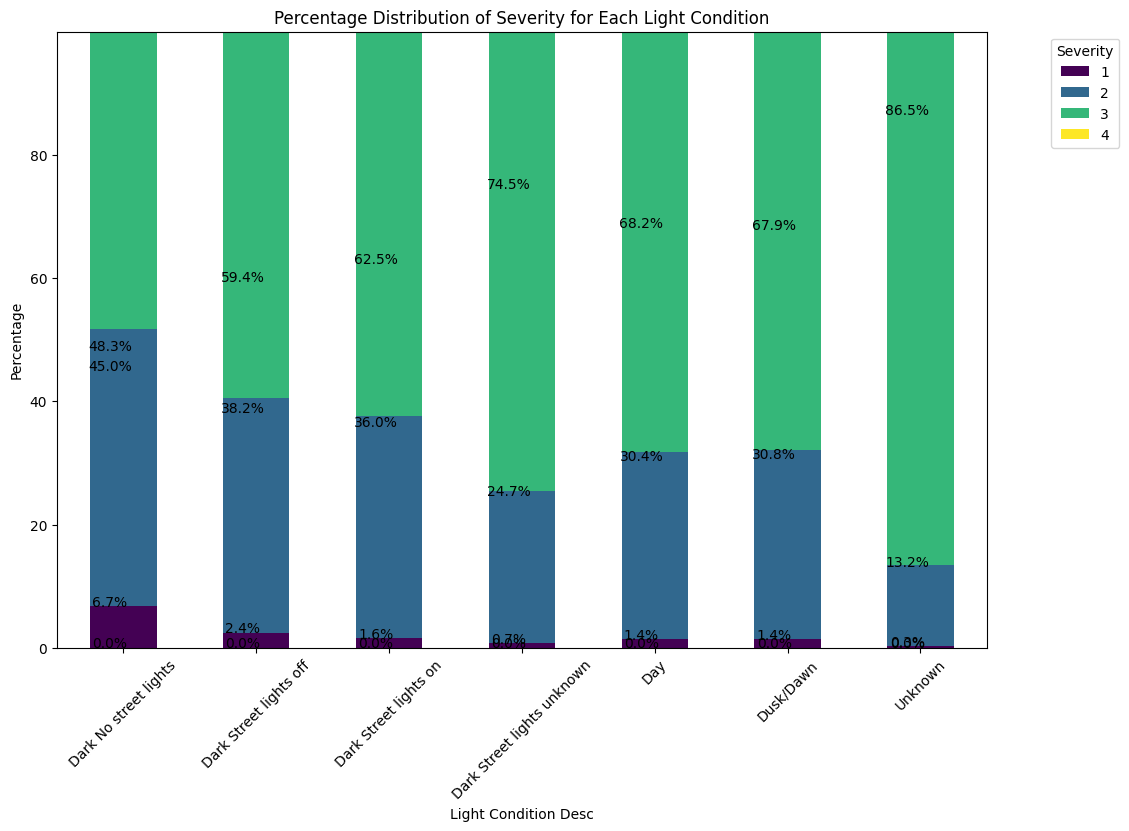

In [101]:
# Group the data by 'Light Condition Desc' and 'SEVERITY', and calculate the percentage distribution of each severity level within each light condition
percentage_by_light_condition = crash_data.groupby(['Light Condition Desc', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_light_condition = percentage_by_light_condition.div(percentage_by_light_condition.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
percentage_by_light_condition.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Light Condition')
plt.xlabel('Light Condition Desc')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages
ax = plt.gca()
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center')

plt.show()


Dark and No Street Lights most Dangerous, followed by Dark Street Lights off

/var/folders/pp/v93sqgpd3dzcpdx34t0c9n280000gn/T/ipykernel_17272/2900083193.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_occupants_range = crash_data.groupby(['OCCUPANTS_RANGE', 'SEVERITY']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

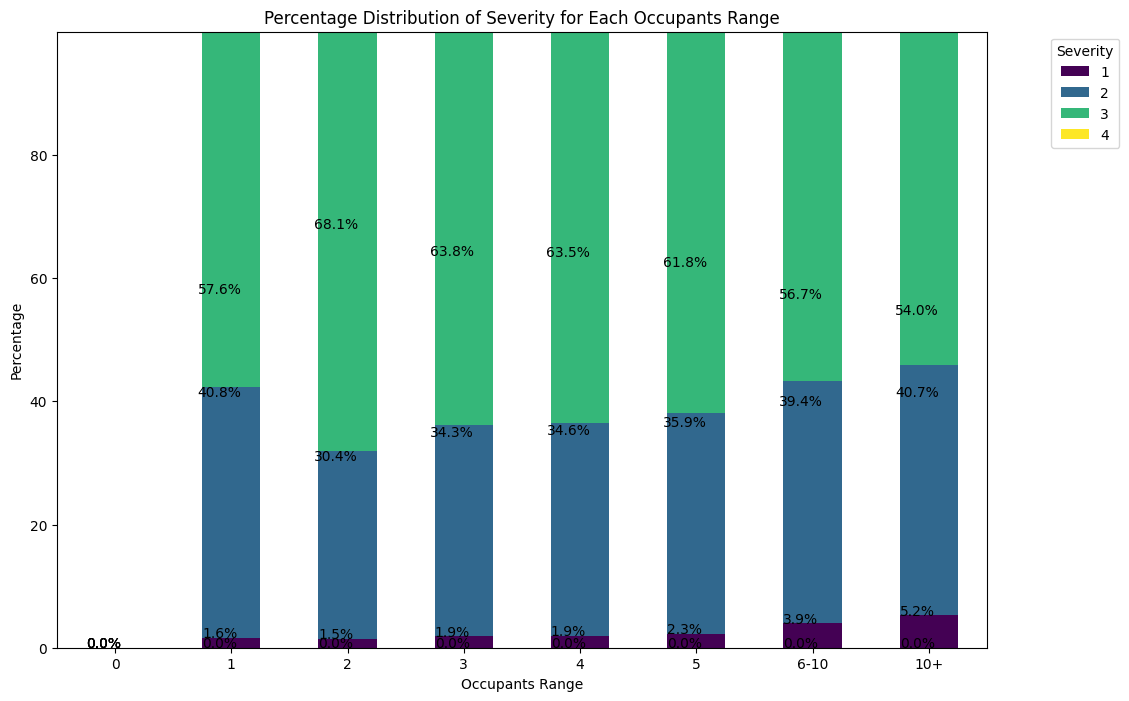

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is loaded into a DataFrame named 'crash_data'

# Define custom bins and labels
bins = [-1, 0, 1, 2, 3, 4, 5, 10, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6-10', '10+']

# Create a new column 'OCCUPANTS_RANGE' with the specified labels based on 'TOTAL_NO_OCCUPANTS'
crash_data['OCCUPANTS_RANGE'] = pd.cut(crash_data['TOTAL_NO_OCCUPANTS'], bins=bins, labels=labels, right=False)

# Group the data by 'OCCUPANTS_RANGE' and 'SEVERITY', and calculate the percentage distribution of each severity level within each range
percentage_by_occupants_range = crash_data.groupby(['OCCUPANTS_RANGE', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_occupants_range = percentage_by_occupants_range.div(percentage_by_occupants_range.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
percentage_by_occupants_range.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Occupants Range')
plt.xlabel('Occupants Range')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages
ax = plt.gca()
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center')

plt.show()


More Occupants seems to be linked to more severe crashes (severity 1)

<Figure size 1200x800 with 0 Axes>

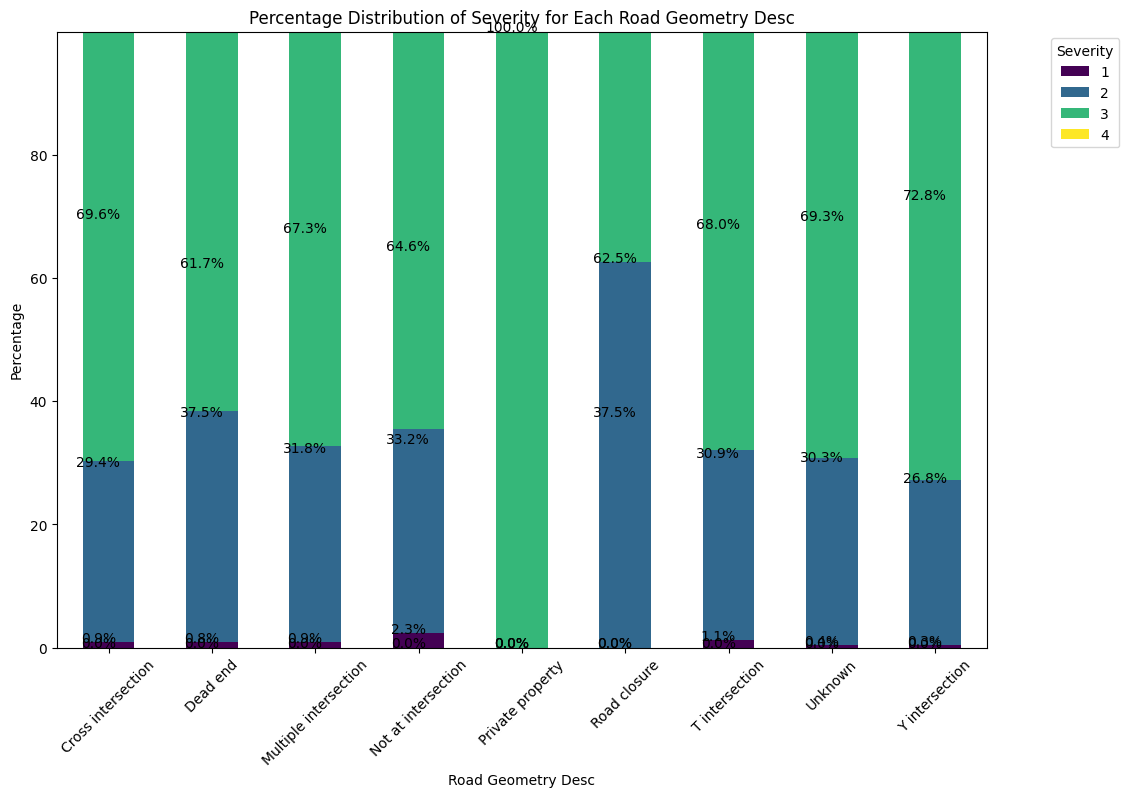

In [103]:
# Group the data by 'Road Geometry Desc' and 'SEVERITY', and calculate the percentage distribution of each severity level within each category
percentage_by_road_geometry = crash_data.groupby(['Road Geometry Desc', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_road_geometry = percentage_by_road_geometry.div(percentage_by_road_geometry.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
percentage_by_road_geometry.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Road Geometry Desc')
plt.xlabel('Road Geometry Desc')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages
ax = plt.gca()
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center')

plt.show()

In [104]:
#note only 5 private property incidents and 8 road closures
crash_data['Road Geometry Desc'].value_counts()

Road Geometry Desc
Not at intersection      289217
Cross intersection       159005
T intersection           153306
Multiple intersection     14209
Y intersection             1738
Unknown                     974
Dead end                    240
Road closure                  8
Private property              5
Name: count, dtype: int64

Unclear if Road Geometry plays a big factor

<Figure size 1200x800 with 0 Axes>

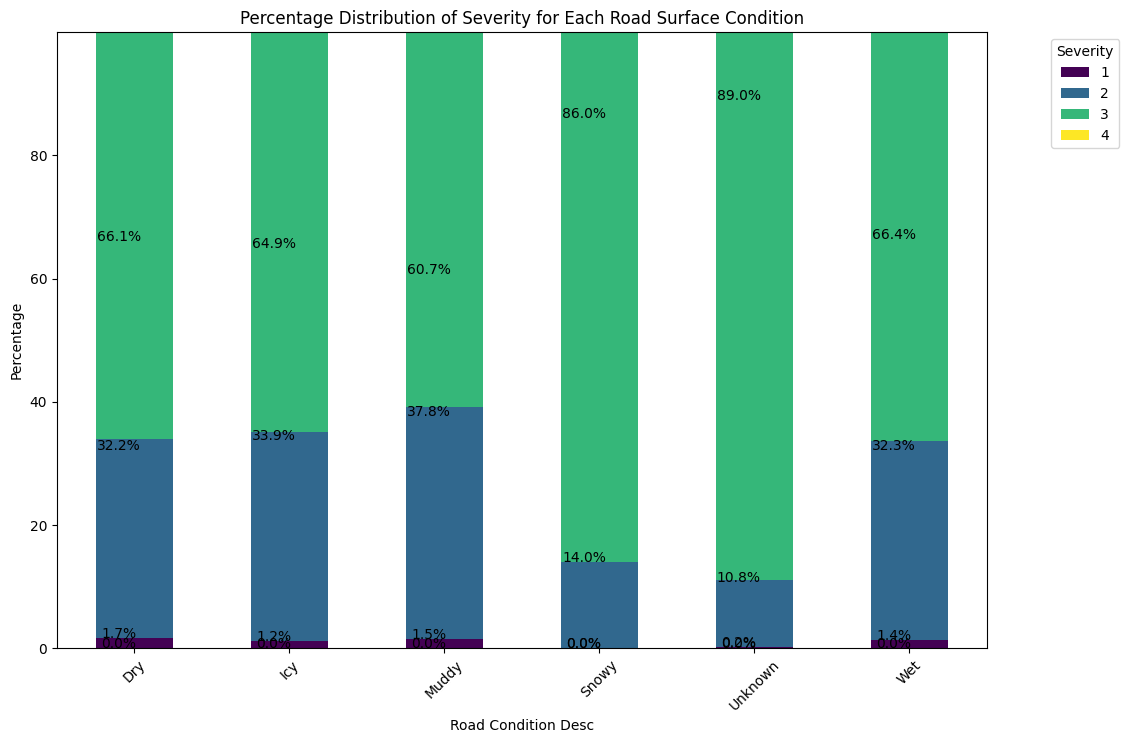

In [105]:
# Group the data by 'Road Geometry Desc' and 'SEVERITY', and calculate the percentage distribution of each severity level within each category
percentage_by_road_condition = crash_data.groupby(['Surface Cond Desc', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_road_condition = percentage_by_road_condition.div(percentage_by_road_condition.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
percentage_by_road_condition.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Road Surface Condition')
plt.xlabel('Road Condition Desc')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages
ax = plt.gca()
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center')

plt.show()

In [106]:
crash_data['Surface Cond Desc'].value_counts()

Surface Cond Desc
Dry        501454
Wet         95547
Unknown     18456
Icy          1559
Muddy        1307
Snowy         379
Name: count, dtype: int64

Surpsingly looks like surface condition has little impact on severity of crash

In [107]:
crash_data['VEHICLE_YEARS_OLD'].value_counts()

VEHICLE_YEARS_OLD
15.0     34835
13.0     32962
14.0     32590
16.0     32080
17.0     31464
         ...  
97.0         1
107.0        1
95.0         1
110.0        1
73.0         1
Name: count, Length: 100, dtype: int64

/var/folders/pp/v93sqgpd3dzcpdx34t0c9n280000gn/T/ipykernel_17272/2340038257.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_vehicle_age = crash_data.groupby(['VEHICLE_AGE_RANGE', 'SEVERITY']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

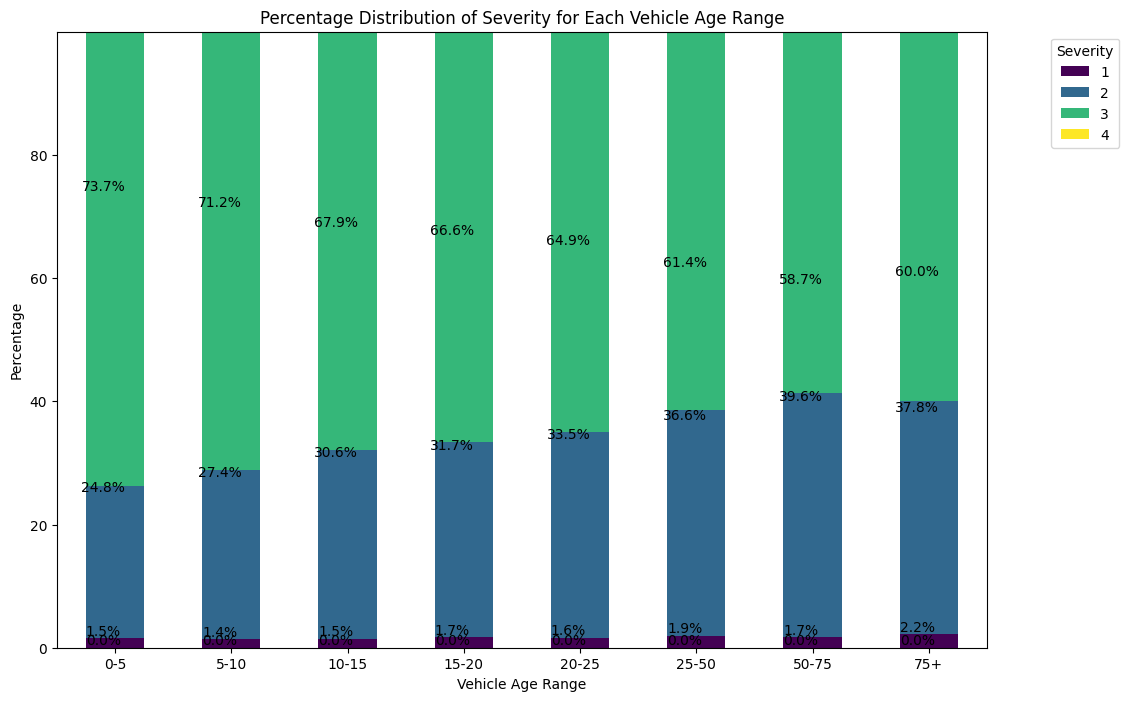

In [108]:

bins = [0, 5, 10, 15, 20, 25, 50, 75, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-50', '50-75', '75+']
crash_data['VEHICLE_AGE_RANGE'] = pd.cut(crash_data['VEHICLE_YEARS_OLD'], bins=bins, labels=labels, right=False)

# Group the data by 'VEHICLE_AGE_RANGE' and 'SEVERITY', and calculate the percentage distribution of each severity level within each category
percentage_by_vehicle_age = crash_data.groupby(['VEHICLE_AGE_RANGE', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_vehicle_age = percentage_by_vehicle_age.div(percentage_by_vehicle_age.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = percentage_by_vehicle_age.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.title('Percentage Distribution of Severity for Each Vehicle Age Range')
plt.xlabel('Vehicle Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Severity', loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate the percentages and counts
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center', va='bottom')
plt.show()


Older vehicles tend to have more severe crashes

<Figure size 800x600 with 0 Axes>

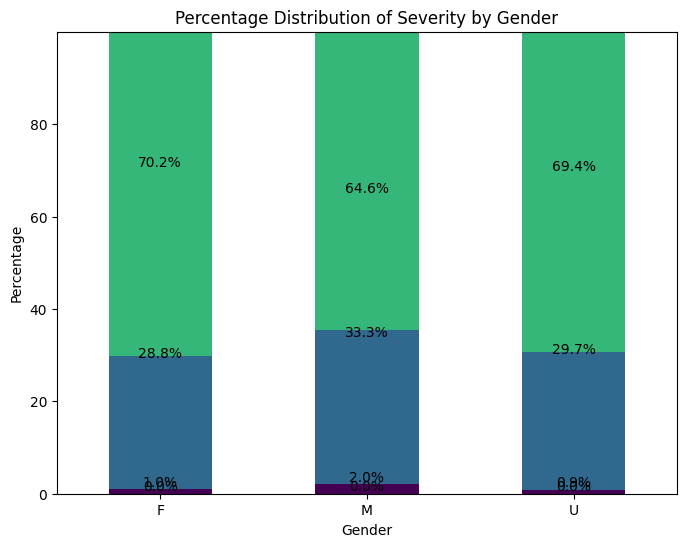

In [109]:
percentage_by_sex = crash_data.groupby(['SEX', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_sex = percentage_by_sex.div(percentage_by_sex.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = percentage_by_sex.plot(kind='bar', stacked=True, cmap='viridis', figsize=(8, 6))
plt.title('Percentage Distribution of Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Annotate the percentages correctly
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()

Males tend to be in more severe accidents than females

<Figure size 800x600 with 0 Axes>

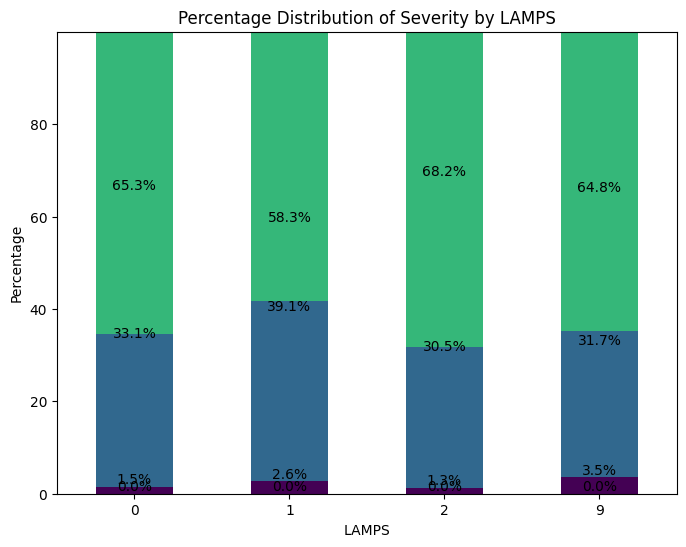

In [114]:
percentage_by_lamps = crash_data.groupby(['LAMPS', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_lamps = percentage_by_lamps.div(percentage_by_lamps.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = percentage_by_lamps.plot(kind='bar', stacked=True, cmap='viridis', figsize=(8, 6))
plt.title('Percentage Distribution of Severity by LAMPS')
plt.xlabel('LAMPS')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Annotate the percentages correctly
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()

May be useful, may be junk data with 9 lamps but 1 lamp seems more dangeous than 2, not sure what 0 lamps means no working headlights

In [116]:
crash_data['LAMPS'].value_counts()

LAMPS
2    477547
1     61263
0     44713
9     35173
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

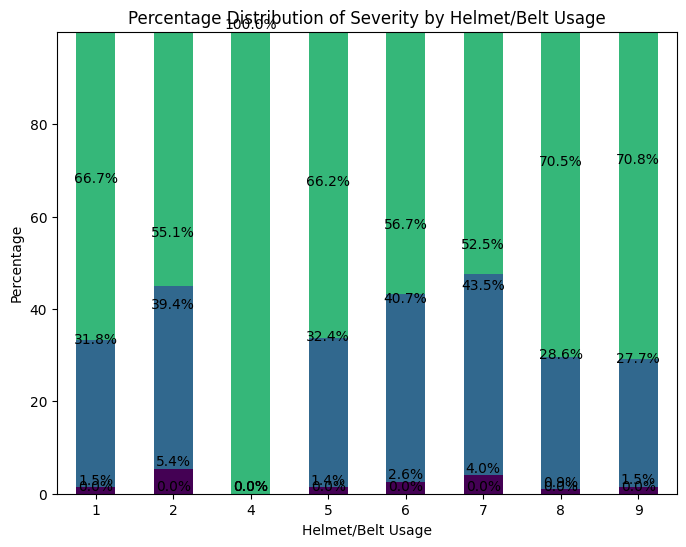

In [110]:
percentage_by_helmet_belt = crash_data.groupby(['HELMET_BELT_WORN', 'SEVERITY']).size().unstack(fill_value=0)
percentage_by_helmet_belt = percentage_by_helmet_belt.div(percentage_by_helmet_belt.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = percentage_by_helmet_belt.plot(kind='bar', stacked=True, cmap='viridis', figsize=(8, 6))
plt.title('Percentage Distribution of Severity by Helmet/Belt Usage')
plt.xlabel('Helmet/Belt Usage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Annotate the percentages correctly
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y:.1f}%', (x, y), fontsize=10, ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()

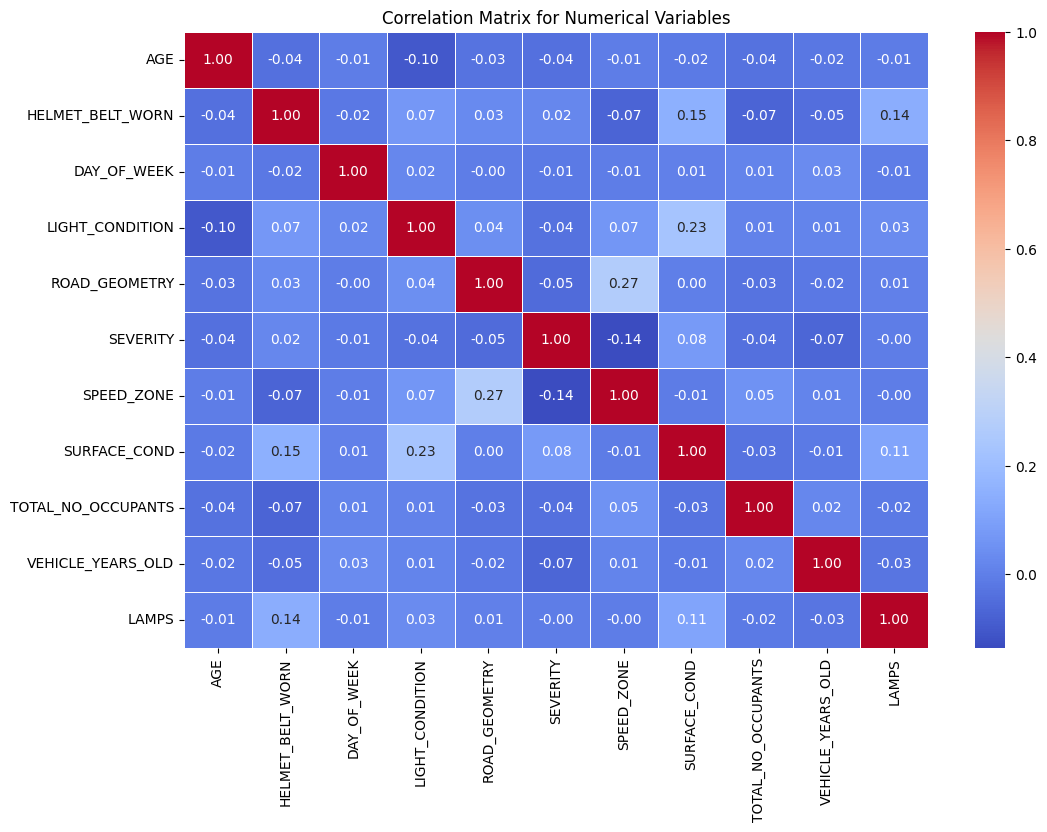

In [111]:
numerical_columns = crash_data.select_dtypes(include=['number'])

# Compute the correlation matrix
numerical_corr = numerical_columns.corr()



plt.figure(figsize=(12, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [112]:
crash_data.isna().sum()

ACCIDENT_NO             0
SEX                     0
AGE                     0
HELMET_BELT_WORN        0
ACCIDENTTIME            0
DAY_OF_WEEK             0
Day Week Description    0
LIGHT_CONDITION         0
Light Condition Desc    0
ROAD_GEOMETRY           0
Road Geometry Desc      0
SEVERITY                0
SPEED_ZONE              0
SURFACE_COND            0
Surface Cond Desc       0
VEHICLE_BODY_STYLE      0
TOTAL_NO_OCCUPANTS      6
VEHICLE_YEARS_OLD       0
LAMPS                   0
AGE_BAND                0
OCCUPANTS_RANGE         6
VEHICLE_AGE_RANGE       0
dtype: int64

In [113]:
crash_data = crash_data[~crash_data['TOTAL_NO_OCCUPANTS'].isna()]

In [93]:
crash_data.to_pickle('clean_crash_data.pkl')
